In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Merge and Clean Dataset:

In [3]:
trial_data.groupby('Mouse ID').count()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
a203,10,10,10
a251,10,10,10
a262,10,10,10
a275,10,10,10
a366,7,7,7
a401,10,10,10
a411,10,10,10
a444,10,10,10
a457,3,3,3


In [4]:
mouse_trial_data = trial_data.merge(mouse_data,how='inner',on='Mouse ID')

In [5]:
# find the mouse id that causes the merged file to be longer than the trial_data.
mouse_trial_data.groupby('Mouse ID').count()[\
                                            mouse_trial_data.groupby('Mouse ID').count()['Metastatic Sites']\
                                             != trial_data.groupby('Mouse ID').count()['Metastatic Sites']\
                                            ]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
Mouse ID,,,,
g989,26,26,26,26


In [6]:
trial_data.groupby('Mouse ID').count()[\
                                            mouse_trial_data.groupby('Mouse ID').count()['Metastatic Sites']\
                                             != trial_data.groupby('Mouse ID').count()['Metastatic Sites']\
                                            ]

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
g989,13,13,13


In [7]:
# "g989" is the offender. Looks like there might be some duplicate information.
mouse_data.loc[mouse_data['Mouse ID'] == 'g989']

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [8]:
# This particular mouse is given 2 drugs?
mouse_trial_data.loc[mouse_trial_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
860,g989,0,45.000000,0,Stelasyn
861,g989,0,45.000000,0,Propriva
862,g989,0,45.000000,0,Stelasyn
863,g989,0,45.000000,0,Propriva
864,g989,5,48.786801,0,Stelasyn
865,g989,5,48.786801,0,Propriva
866,g989,5,47.570392,0,Stelasyn
867,g989,5,47.570392,0,Propriva
868,g989,10,51.745156,0,Stelasyn
869,g989,10,51.745156,0,Propriva


-There should be 250 mice in total, so these 2 must have been given the same name. Maybe modify the names to "g989s" and "g989p".

-Unfortunately from the trial_data, it cannot be determined which "g989" trial refers to which drug. (See below)

-Therefore we have to drop all data for "g989" as it can lead to false data.

In [9]:
trial_data.loc[trial_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [10]:
mouse_trial_data = mouse_trial_data.loc[mouse_trial_data['Mouse ID'] != 'g989']

In [11]:
mouse_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [12]:
mouse_trial_data.loc[(mouse_trial_data['Timepoint']==0) & (mouse_trial_data['Tumor Volume (mm3)'] != 45) ]
# This ensures all mice start with a Tumor Volume of 45.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug


## Tumor Response to Treatment

In [13]:
avg_tumor_vol = mouse_trial_data.groupby(['Drug','Timepoint']).mean()
avg_tumor_vol.drop(columns='Metastatic Sites', inplace=True)
avg_tumor_vol = avg_tumor_vol.reset_index()
avg_tumor_vol.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [14]:
sem_tumor_vol = mouse_trial_data.groupby(['Drug','Timepoint']).sem()
sem_tumor_vol.drop(columns=['Metastatic Sites','Mouse ID'], inplace=True)
sem_tumor_vol = sem_tumor_vol.reset_index()
sem_tumor_vol.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [43]:
new_avg_tumor = avg_tumor_vol.pivot(index='Timepoint',columns='Drug')
new_avg_tumor.columns = new_avg_tumor.columns.droplevel()
new_avg_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [44]:
new_sem_tumor = sem_tumor_vol.pivot(index='Timepoint',columns='Drug')
new_sem_tumor.columns = new_sem_tumor.columns.droplevel()
new_sem_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


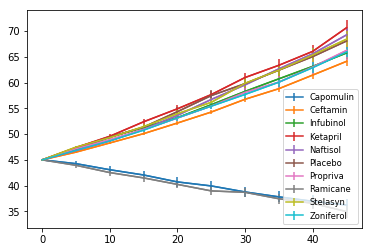

In [46]:
### Simple way to display plots: 
# does not allow user to select colors, but allows user to easily preview any column

x_axis = new_avg_tumor.index.values


fig, ax = plt.subplots()

ax.plot(new_avg_tumor)


for i in range(0,len(new_avg_tumor.columns)):
    ax.errorbar(x_axis,new_avg_tumor.iloc[:,i].values,yerr=new_sem_tumor.iloc[:,i].values, label=new_avg_tumor.columns[i])

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()


In [18]:
# Define x_axis and all dedsired columns
x_axis = new_avg_tumor.index.values

cap_avg = new_avg_tumor['Capomulin'].values
inf_avg = new_avg_tumor['Infubinol'].values
keta_avg = new_avg_tumor['Ketapril'].values
plac_avg = new_avg_tumor['Placebo'].values

cap_sem = new_sem_tumor['Capomulin'].values
inf_sem = new_sem_tumor['Infubinol'].values
keta_sem = new_sem_tumor['Ketapril'].values
plac_sem = new_sem_tumor['Placebo'].values

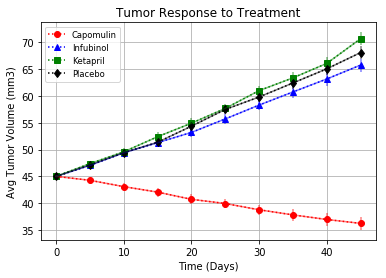

In [19]:
fig, ax = plt.subplots()

ax.plot(x_axis,cap_avg,marker='o', color='r', label='Capomulin', linestyle=':')
ax.plot(x_axis,inf_avg,marker='^', color='b', label='Infubinol', linestyle=':')
ax.plot(x_axis,keta_avg,marker='s', color='g', label='Ketapril', linestyle=':')
ax.plot(x_axis,plac_avg,marker='d', color='k', label='Placebo', linestyle=':')

ax.errorbar(x_axis,cap_avg,yerr=cap_sem,color='r',alpha=.5)
ax.errorbar(x_axis,inf_avg,yerr=cap_sem,color='b',alpha=.5)
ax.errorbar(x_axis,keta_avg,yerr=cap_sem,color='g',alpha=.5)
ax.errorbar(x_axis,plac_avg,yerr=cap_sem,color='k',alpha=.5)

ax.set_title('Tumor Response to Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Avg Tumor Volume (mm3)')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig("Tumor_Treatment_Response.png")
plt.show()

## Metastatic Response to Treatment

In [20]:
avg_tumor_meta = mouse_trial_data.groupby(['Drug','Timepoint']).mean()
avg_tumor_meta.drop(columns='Tumor Volume (mm3)', inplace=True)
avg_tumor_meta = avg_tumor_meta.reset_index()
avg_tumor_meta.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [21]:
sem_tumor_meta = mouse_trial_data.groupby(['Drug','Timepoint']).sem()
sem_tumor_meta.drop(columns=['Tumor Volume (mm3)','Mouse ID'], inplace=True)
sem_tumor_meta = sem_tumor_meta.reset_index()
sem_tumor_meta.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [47]:
new_avg_tumor_meta = avg_tumor_meta.pivot(index='Timepoint',columns='Drug')
new_avg_tumor_meta.columns = new_avg_tumor_meta.columns.droplevel()

new_sem_tumor_meta = sem_tumor_meta.pivot(index='Timepoint',columns='Drug')
new_sem_tumor_meta.columns = new_sem_tumor_meta.columns.droplevel()

new_avg_tumor_meta

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [23]:
# Define x_axis and all dedsired columns
x_axis = new_avg_tumor_meta.index.values

cap_avg = new_avg_tumor_meta['Capomulin'].values
inf_avg = new_avg_tumor_meta['Infubinol'].values
keta_avg = new_avg_tumor_meta['Ketapril'].values
plac_avg = new_avg_tumor_meta['Placebo'].values

cap_sem = new_sem_tumor_meta['Capomulin'].values
inf_sem = new_sem_tumor_meta['Infubinol'].values
keta_sem = new_sem_tumor_meta['Ketapril'].values
plac_sem = new_sem_tumor_meta['Placebo'].values

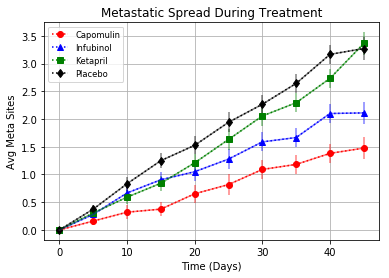

In [24]:
fig, ax = plt.subplots()

ax.plot(x_axis,cap_avg,marker='o', color='r', label='Capomulin', linestyle=':')
ax.plot(x_axis,inf_avg,marker='^', color='b', label='Infubinol', linestyle=':')
ax.plot(x_axis,keta_avg,marker='s', color='g', label='Ketapril', linestyle=':')
ax.plot(x_axis,plac_avg,marker='d', color='k', label='Placebo', linestyle=':')

ax.errorbar(x_axis,cap_avg,yerr=cap_sem,color='r',alpha=.5)
ax.errorbar(x_axis,inf_avg,yerr=cap_sem,color='b',alpha=.5)
ax.errorbar(x_axis,keta_avg,yerr=cap_sem,color='g',alpha=.5)
ax.errorbar(x_axis,plac_avg,yerr=cap_sem,color='k',alpha=.5)

ax.set_title('Metastatic Spread During Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Avg Meta Sites')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig('Metastatic_Spread.png')
plt.show()

In [25]:
mouse_trial_count = mouse_trial_data.groupby(['Drug','Timepoint']).count()
mouse_trial_count.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'], inplace=True)
mouse_trial_count = mouse_trial_count.reset_index()
mouse_trial_count.rename(columns = {'Mouse ID':'Mouse Count'}, inplace=True)
mouse_trial_count.head(20)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [26]:
new_mouse_trial_count = mouse_trial_count.pivot(index='Timepoint',columns='Drug')
new_mouse_trial_count.columns = new_mouse_trial_count.columns.droplevel()
new_mouse_trial_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


In [27]:
# Define x_axis and all dedsired columns
x_axis = new_mouse_trial_count.index.values

cap_count = new_mouse_trial_count['Capomulin'].values
cap_rate = cap_count/cap_count[0] * 100

inf_count = new_mouse_trial_count['Infubinol'].values
inf_rate = inf_count/inf_count[0] * 100

keta_count = new_mouse_trial_count['Ketapril'].values
keta_rate = keta_count/keta_count[0] * 100

plac_count = new_mouse_trial_count['Placebo'].values
plac_rate = plac_count/plac_count[0] * 100


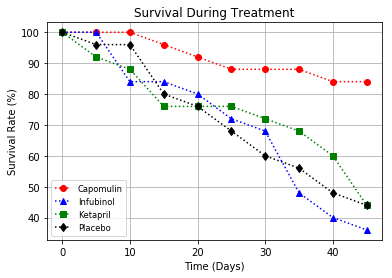

In [28]:
fig, ax = plt.subplots()

ax.plot(x_axis, cap_rate, marker='o', color='r', label='Capomulin', linestyle=':')
ax.plot(x_axis, inf_rate, marker='^', color='b', label='Infubinol', linestyle=':')
ax.plot(x_axis, keta_rate, marker='s', color='g', label='Ketapril', linestyle=':')
ax.plot(x_axis, plac_rate, marker='d', color='k', label='Placebo', linestyle=':')


ax.set_title('Survival During Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.savefig('Survival_During_Treatment.png')
plt.show()

In [29]:
vol_percent = new_avg_tumor.apply(lambda vol: (vol[45]-vol[0])/vol[0] * 100)

In [30]:
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
vol_tup = (vol_percent['Capomulin'],vol_percent['Infubinol'],vol_percent['Ketapril'],vol_percent['Placebo'])
vol_tup

(-19.475302667894155, 46.12347172785184, 57.02879468660604, 51.29796048315153)

In [31]:
cmap = []
for i in range(0,len(vol_tup)):
    if vol_tup[i] < 0:
        cmap.append('green')
    else:
        cmap.append('red')
        
cmap

['green', 'red', 'red', 'red']

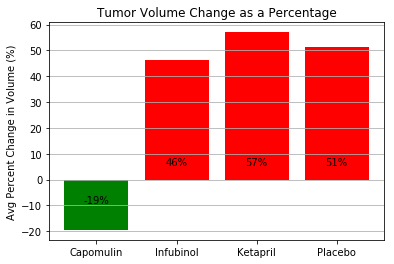

In [32]:
x_axis = np.arange(len(drugs))

fig, ax = plt.subplots()

vol_bar = ax.bar(x_axis,vol_tup, color=cmap,align='center')

ax.set_xticks(x_axis)
ax.set_xticklabels(drugs)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if height < 0:
            ax.text(rect.get_x() + rect.get_width()/2., -10,
                    f'{int(height)}%',
                    ha='center', va='bottom')
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 5,
                    f'{int(height)}%',
                    ha='center', va='bottom')

autolabel(vol_bar)

ax.set_title('Tumor Volume Change as a Percentage')
ax.set_ylabel('Avg Percent Change in Volume (%)')

ax.yaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.savefig("Tumor_Change_Percentage.png")
plt.show()

# 3 Observable Trends:

1. Capomulin appears to be the most successful drug compared to the other 3 analyzed treatments. Capomulin appears to be the only drug that decreased the tumor volume over the 45 day period.

2. The standard error for Capomulin was 1.22 at the 45 day period, which was roughly the median of the standard error for all tested drugs. This shows the confidence in the capomulin tests are pretty high because the results are very similar. 

3. It's worth noting there is another drug Ramicane that also decreased tumor volumes and had a very similar survival rate to Capomulin. There are a couple observations to be made comparing these 2 solutions, but overall these 2 greatly outperformed the other drugs. Ramicane actually shows less metastatic spread than Capomulin, but on the flip side Capomulin shows slightly less tumor volume and a higher survival rate. 

Ramicane: Average Tumor Volumne of 34.95, Average Metastatic Spread 1.25, Survival rate 80%

Capomulin: Average Tumor Volume of 36.24, Average Metastatic Spread 1.47, Survival Rate 84%   
   